In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats
from scipy.stats import chi2_contingency

In [636]:
dimonds=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Dimonds_analysis/diamonds.csv")

In [637]:
dimonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [638]:
dimonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Data cleaning

In [639]:
dimonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [640]:
dimonds.duplicated().sum()

146

In [641]:
dimonds.drop_duplicates(inplace=True)

In [642]:
# new column 
dimonds["price_per_carat"]=dimonds["price"]/dimonds["carat"]


In [643]:
# Dimond score
# inspired by: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/#:~:text=When%20writing%20the%20grades%20of,0%2F0–1.000%20carat.

dimonds["cut_score"]=dimonds["cut"]
dimonds["color_score"]=dimonds["color"]
dimonds["clarity_score"]=dimonds["clarity"]

#["Fair", "Good", "Very Good", "Premium", "Ideal"]
dimonds["cut_score"]=np.where(dimonds["cut_score"]=="Ideal",0,dimonds["cut_score"])
dimonds["cut_score"]=np.where(dimonds["cut_score"]=="Premium",0,dimonds["cut_score"])
dimonds["cut_score"]=np.where(dimonds["cut_score"]=="Very Good",1,dimonds["cut_score"])
dimonds["cut_score"]=np.where(dimonds["cut_score"]=="Good",2,dimonds["cut_score"])
dimonds["cut_score"]=np.where(dimonds["cut_score"]=="Fair",3,dimonds["cut_score"])

#["J","I","H","G","F","E","D"]

dimonds["color_score"]=np.where(dimonds["color_score"]=="D",0,dimonds["color_score"])
dimonds["color_score"]=np.where(dimonds["color_score"]=="E",0.5,dimonds["color_score"])
dimonds["color_score"]=np.where(dimonds["color_score"]=="F",1,dimonds["color_score"])
dimonds["color_score"]=np.where(dimonds["color_score"]=="G",1.5,dimonds["color_score"])
dimonds["color_score"]=np.where(dimonds["color_score"]=="H",2,dimonds["color_score"])
dimonds["color_score"]=np.where(dimonds["color_score"]=="I",2.5,dimonds["color_score"])
dimonds["color_score"]=np.where(dimonds["color_score"]=="J",3,dimonds["color_score"])

#["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
dimonds["clarity_score"]=np.where(dimonds["clarity_score"]=="IF",0,dimonds["clarity_score"])
dimonds["clarity_score"]=np.where((dimonds["clarity_score"]=="VVS1")|(dimonds["clarity_score"]=="VVS2"),0.5,dimonds["clarity_score"])
dimonds["clarity_score"]=np.where((dimonds["clarity_score"]=="VS1")|(dimonds["clarity_score"]=="VS2"),1,dimonds["clarity_score"])
dimonds["clarity_score"]=np.where((dimonds["clarity_score"]=="SI1")|(dimonds["clarity_score"]=="SI2"),2,dimonds["clarity_score"])
dimonds["clarity_score"]=np.where(dimonds["clarity_score"]=="I1",3,dimonds["clarity_score"])



dimonds["dimond_score"]=((dimonds["cut_score"]*0.35)+(dimonds["color_score"]*0.325)+(dimonds["clarity_score"]*0.325))

In [644]:

# 
dimonds["carat_label"]=dimonds["carat"].apply(lambda value: 
"XS" if value<0.5
else "S" if value<1 
else "M" if value<2
else "L" if value < 4
else "XL")

In [645]:
dimonds["price_label"]=dimonds["price_per_carat"].apply(lambda value: 
"Low" if value<3000
else "Average" if value<10000 
else "High" if value < 15000
else "Extra" )

In [646]:
dimonds.loc[(dimonds["carat_label"]=="XS"),["carat","price","price_per_carat"]].head(5)

,carat,price,price_per_carat
0,0.23,326,1417.391304
1,0.21,326,1552.380952
2,0.23,327,1421.739130
3,0.29,334,1151.724138
4,0.31,335,1080.645161


In [647]:
dimonds.loc[(dimonds["carat_label"]=="M"),["carat","price","price_per_carat"]].tail(5)

,carat,price,price_per_carat
53793,1.01,2730,2702.970297
53863,1.00,2743,2743.000000
53875,1.04,2745,2639.423077
53879,1.04,2745,2639.423077
53897,1.02,2751,2697.058824


In [648]:
dimonds.describe()

,carat,depth,table,price,x,y,z,price_per_carat
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714,4009.762194
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037,2013.547539
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.162791
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,2478.431373
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3496.341463
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000,4950.000000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,17828.846154


In [649]:
# Identifying & removing  outlires 

def find_outlires_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outlires=df[(df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))]
    return outlires

find_outlires_IQR(dimonds["price_per_carat"]).sort_values(ascending=False)

27635    17828.846154
27530    17083.177570
27226    17077.669903
27457    16928.971963
26998    16764.705882
             ...     
25842     8658.139535
25241     8658.125000
27628     8657.943925
27191     8657.920792
24590     8657.718121
Name: price_per_carat, Length: 1820, dtype: float64

In [650]:
dimonds.sort_values(by="price_per_carat",ascending=False).head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,cut_score,color_score,clarity_score,dimond_score,carat_label,price_label
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154,1,0,0,0.35,M,Extra
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570,0,0,0,0.0,M,Extra
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.669903,0,0,0,0.0,M,Extra
27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.971963,1,0,0,0.35,M,Extra
26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.705882,1,0,0,0.35,M,Extra


In [651]:
find_outlires_IQR(dimonds["price"]).sort_values(ascending=False)

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
23829    11903
23828    11901
23827    11899
23826    11899
23825    11897
Name: price, Length: 3523, dtype: int64

In [652]:
dimonds.describe()

,carat,depth,table,price,x,y,z,price_per_carat
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714,4009.762194
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037,2013.547539
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.162791
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,2478.431373
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3496.341463
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000,4950.000000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,17828.846154


In [653]:
# Turning cut,color, clarity, carat_label into categories (sorted from the worst to the best)

dimonds["cut"]=pd.Categorical(dimonds["cut"],["Fair", "Good", "Very Good", "Premium", "Ideal"])
dimonds["color"]=pd.Categorical(dimonds["color"],["J","I","H","G","F","E","D"]) 
dimonds["clarity"]=pd.Categorical(dimonds["clarity"],["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
dimonds["carat_label"]=pd.Categorical(dimonds["carat_label"],["XS","S","M","L","XL"])
dimonds["price_label"]=pd.Categorical(dimonds["price_label"],["Low","Average","High","Extra"])


EDA

In [654]:
plt.style.use("dark_background")

mode 605


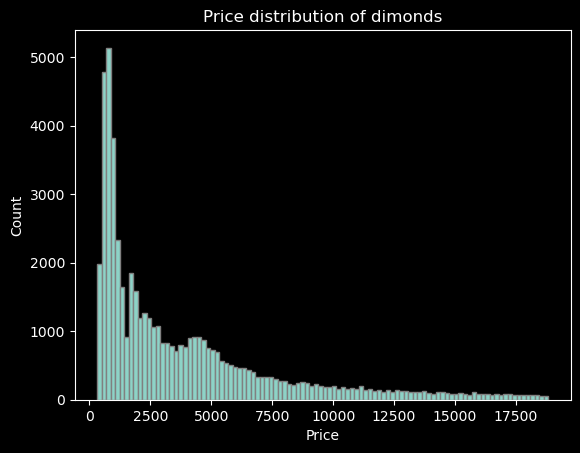

In [655]:
# Price distribution
x=dimonds["price"]
num_bins=100

plt.title("Price distribution of dimonds")
plt.xlabel("Price")
plt.ylabel("Count")
plt.style.use("dark_background")
plt.hist(x, num_bins,edgecolor="grey")
plt.show
print("mode",statss.mode(dimonds["price"]))

median 3496.3414634146343
mode 2250.0


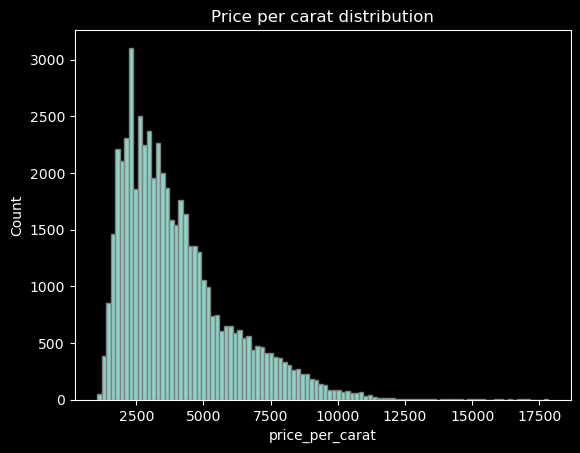

In [656]:
# Price distribution
x=dimonds["price_per_carat"]
num_bins=100

plt.title("Price per carat distribution")
plt.xlabel("price_per_carat")
plt.ylabel("Count")
plt.style.use("dark_background")
plt.hist(x, num_bins,edgecolor="grey")
plt.show


print("median",statss.median(dimonds["price_per_carat"]))
print("mode",statss.mode(dimonds["price_per_carat"]))

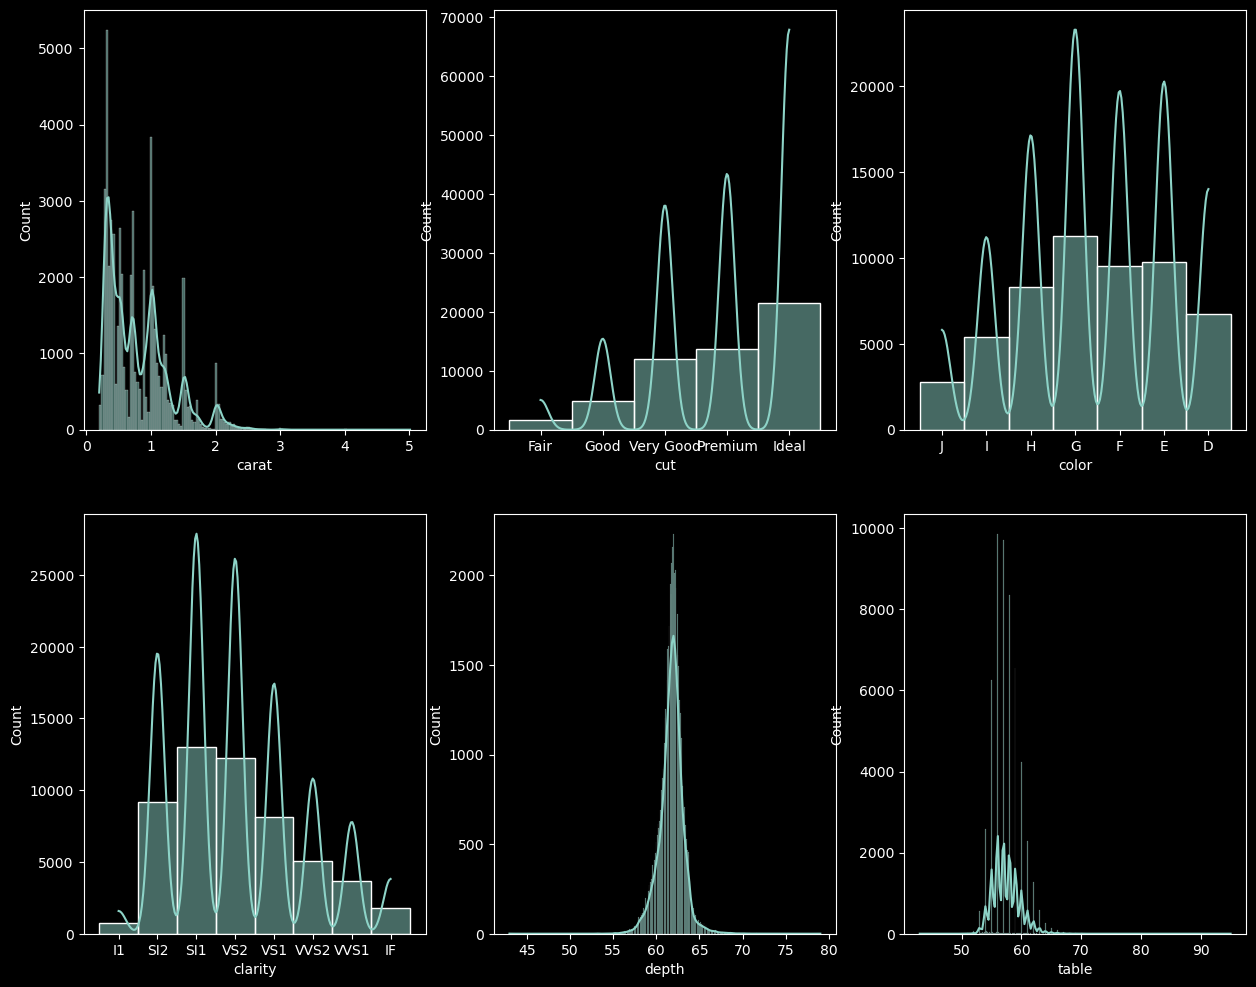

In [657]:
#Distribution of 

fig,axs=plt.subplots(2,3,figsize=(15,12))
ax.set_title("Distribution")
sns.histplot(data=dimonds,x="carat",kde=True,ax=axs[0,0])
sns.histplot(data=dimonds,x="cut",kde=True,ax=axs[0,1])
sns.histplot(data=dimonds,x="color",kde=True,ax=axs[0,2])
sns.histplot(data=dimonds,x="clarity",kde=True,ax=axs[1,0])
sns.histplot(data=dimonds,x="depth",kde=True,ax=axs[1,1])
sns.histplot(data=dimonds,x="table",kde=True,ax=axs[1,2])
plt.show()

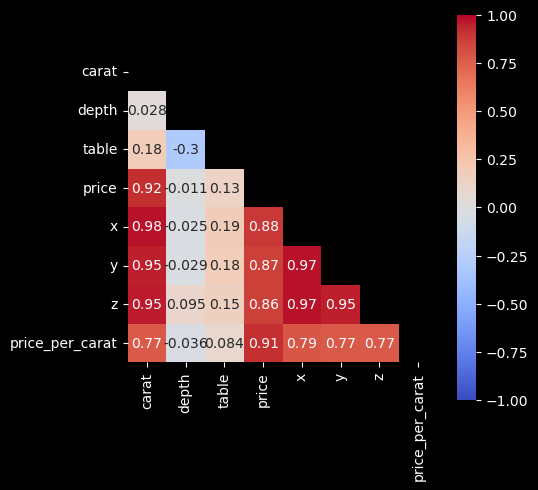

In [658]:

matrix=dimonds.corr()
fig,ax=plt.subplots(figsize=(5,5))
# Generate a mask to onlyshow the bottom triangle
mask=np.triu(np.ones_like(matrix,dtype=bool))

sns.heatmap(matrix,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True,mask=mask)



plt.show()

In [659]:
# Correlation between categorical variables

#Cross tabulation between cut and clarity 
Crosstab_Cut_Clarity=pd.crosstab(index=dimonds["cut"],columns=dimonds["clarity"])
print(Crosstab_Cut_Clarity)

# Performing Chi-sq test
ChiSqResult_cut_clarity = chi2_contingency(Crosstab_Cut_Clarity)
 

 
print('The P-Value of the ChiSq Test is:', ChiSqResult_cut_clarity[1])


clarity     I1   SI2   SI1   VS2   VS1  VVS2  VVS1    IF
cut                                                     
Fair       210   459   406   258   170    69    17     9
Good        95  1074  1555   978   646   286   186    71
Very Good   84  2096  3236  2587  1774  1235   789   268
Premium    205  2927  3567  3350  1984   869   616   230
Ideal      146  2594  4268  5056  3582  2597  2039  1206
The P-Value of the ChiSq Test is: 0.0


In [660]:
#Cross tabulation between cut and color
Crosstab_Cut_Color=pd.crosstab(index=dimonds["cut"],columns=dimonds["color"])
print(Crosstab_Cut_Color)

# Performing Chi-sq test
Crosstab_Cut_Color = chi2_contingency(Crosstab_Cut_Color)

 
 
print('The P-Value of the ChiSq Test is:', Crosstab_Cut_Color[1])



color        J     I     H     G     F     E     D
cut                                               
Fair       119   174   299   312   309   222   163
Good       306   518   699   869   908   931   660
Very Good  677  1203  1819  2298  2163  2399  1510
Premium    806  1422  2351  2918  2321  2331  1599
Ideal      894  2090  3104  4865  3819  3893  2823
The P-Value of the ChiSq Test is: 5.822229431410356e-51


In [661]:
#Cross tabulation between clarity and color
Crosstab_Clarity_Color=pd.crosstab(index=dimonds["clarity"],columns=dimonds["color"])
print(Crosstab_Clarity_Color)

# Performing Chi-sq test
Crosstab_Clarity_Color = chi2_contingency(Crosstab_Clarity_Color)
 
 
print('The P-Value of the ChiSq Test is:', Crosstab_Clarity_Color[1])

color      J     I     H     G     F     E     D
clarity                                         
I1        50    92   162   150   143   101    42
SI2      479   904  1552  1543  1601  1704  1367
SI1      750  1421  2268  1969  2127  2423  2074
VS2      729  1166  1639  2342  2198  2464  1691
VS1      539   961  1166  2142  1362  1281   705
VVS2     130   365   604  1443   972   989   553
VVS1      74   355   583   995   734   656   250
IF        51   143   298   678   383   158    73
The P-Value of the ChiSq Test is: 0.0


In [662]:
#Cross tabulation between cut and carat
Crosstab_Cut_Carat=pd.crosstab(index=dimonds["cut"],columns=dimonds["carat_label"])
print(Crosstab_Cut_Carat)

# Performing Chi-sq test
Crosstab_Cut_Carat = chi2_contingency(Crosstab_Cut_Carat)
 
 
print('The P-Value of the ChiSq Test is:', Crosstab_Cut_Carat[1])

carat_label    XS     S     M    L  XL
cut                                   
Fair          112   678   655  150   3
Good         1201  1789  1691  210   0
Very Good    3552  4253  3816  447   1
Premium      4027  3554  5354  811   2
Ideal        8716  6909  5351  512   0
The P-Value of the ChiSq Test is: 0.0


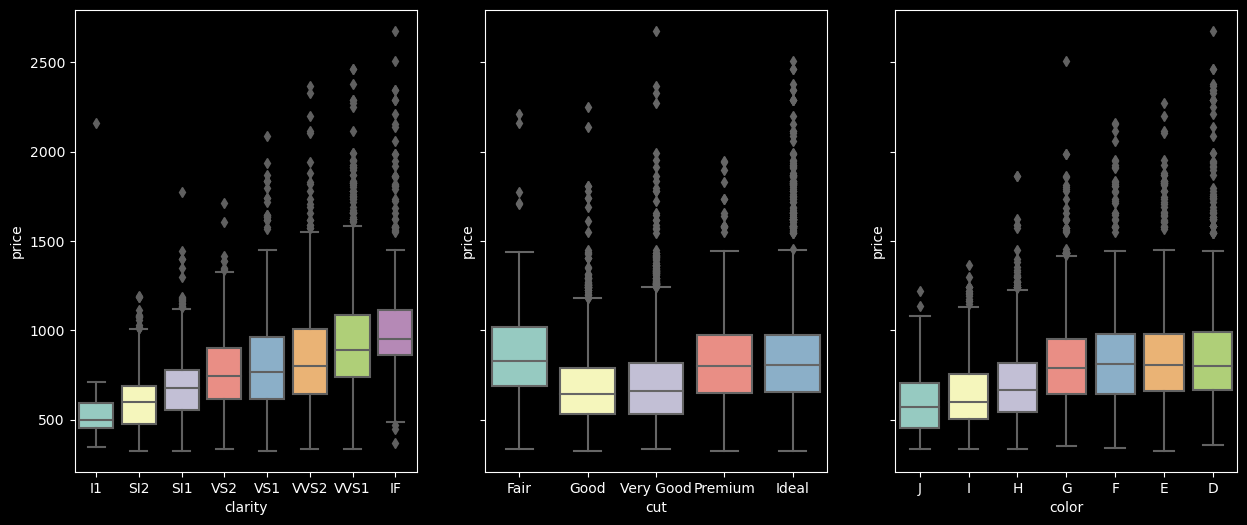

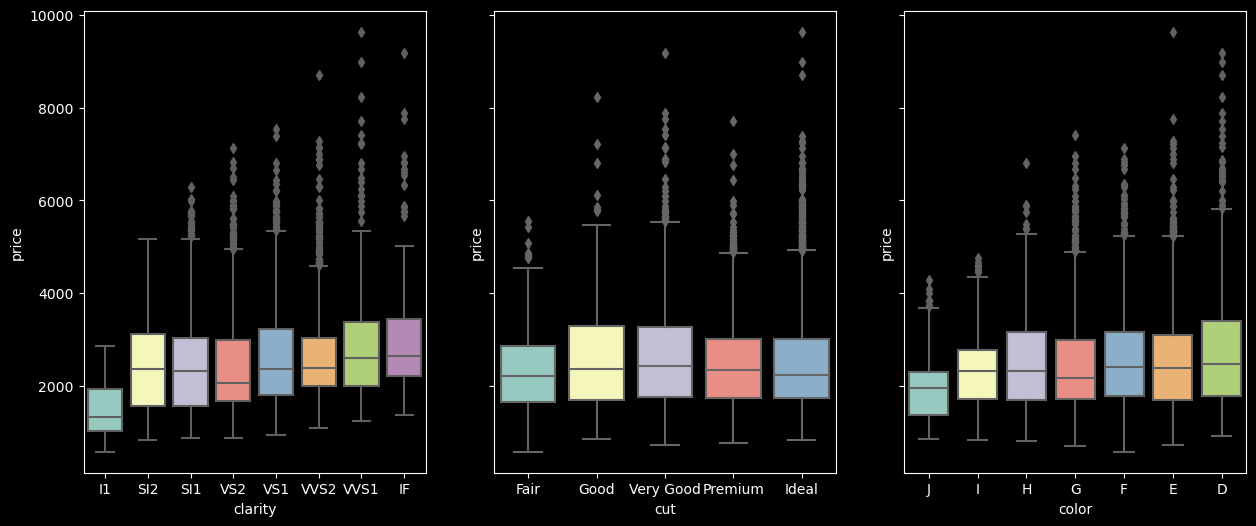

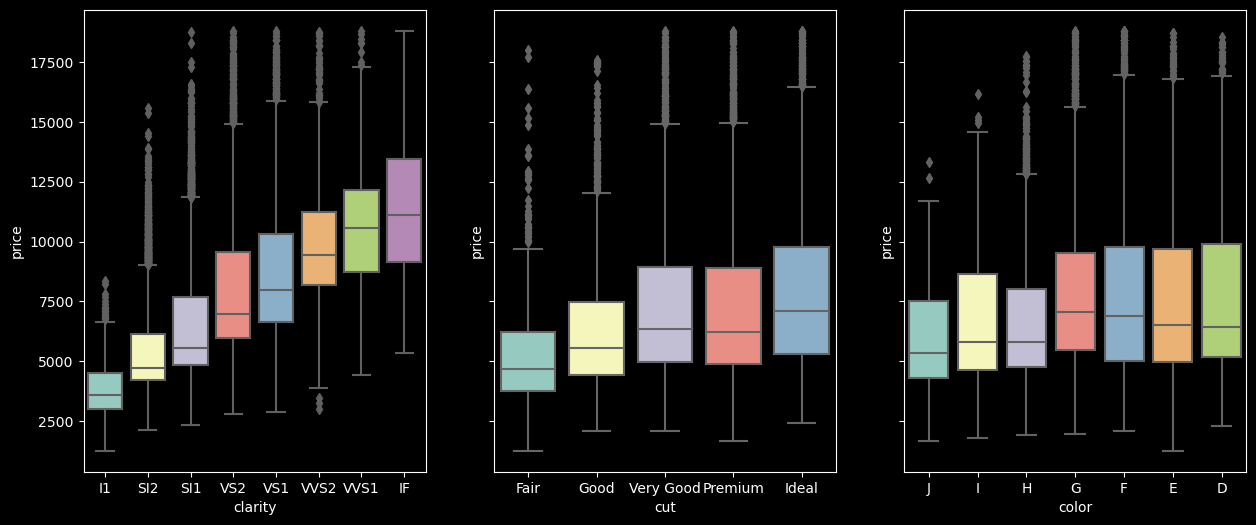

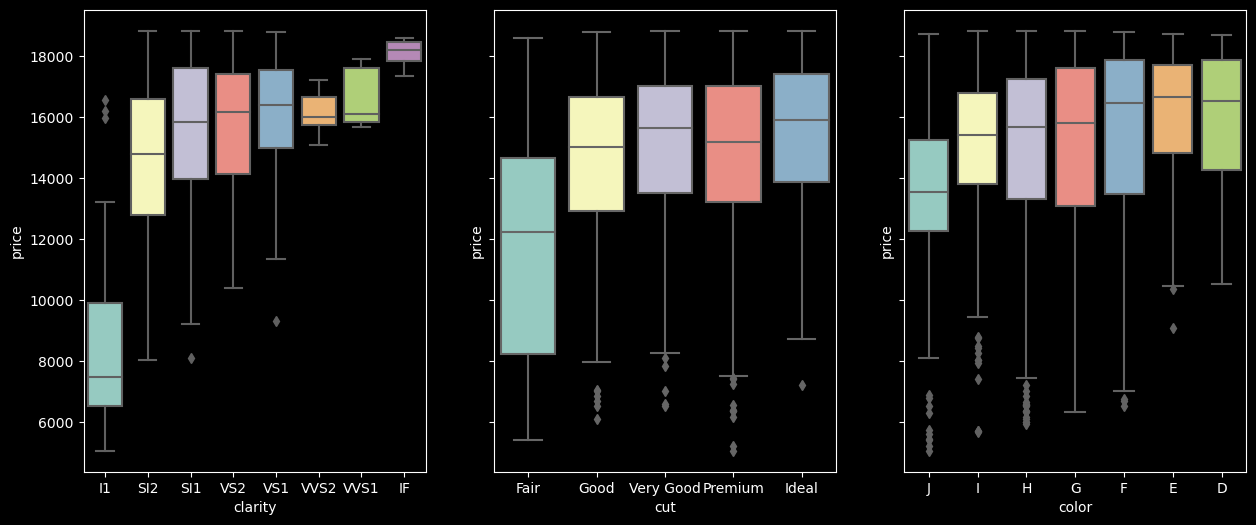

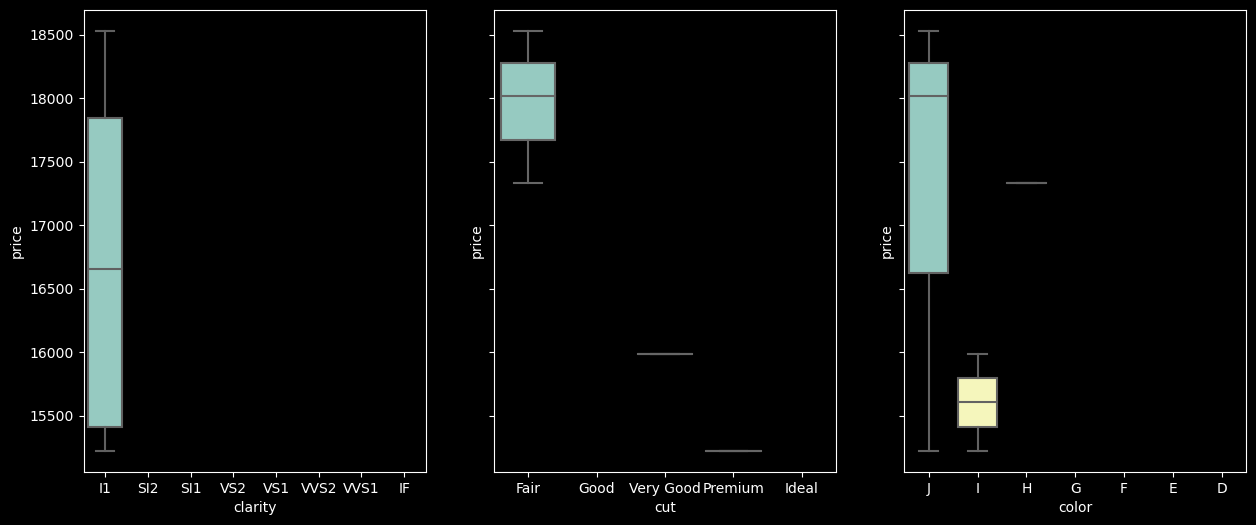

In [692]:
carat_label_list=["XS","S","M","L","XL"]

for carat_label in  carat_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,6))
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="clarity", ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="cut",ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="color",ax=axs[2])
    ax.set_title(carat_label)


    plt.show()

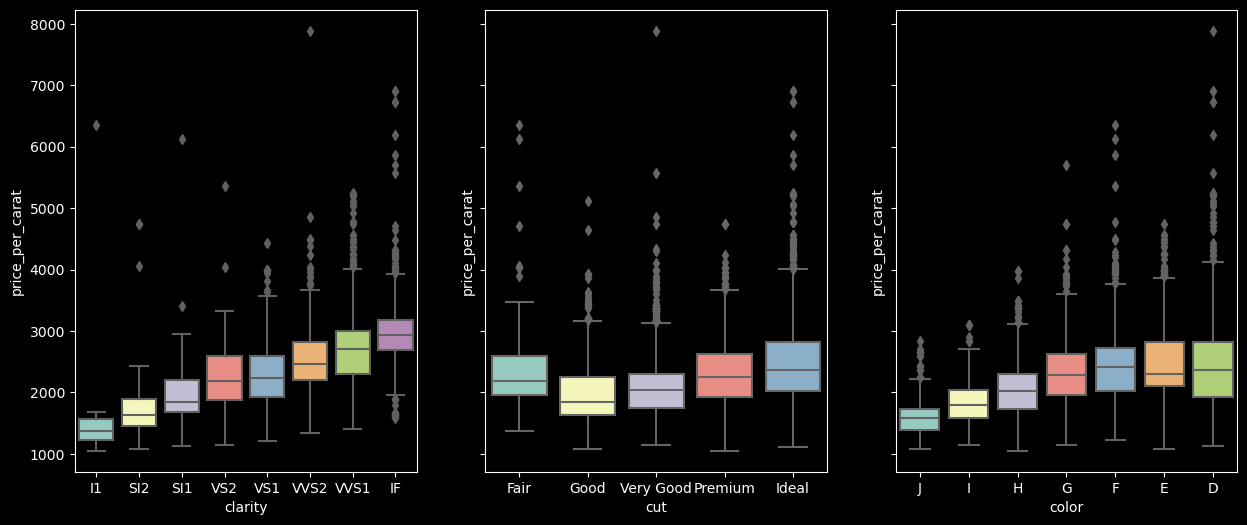

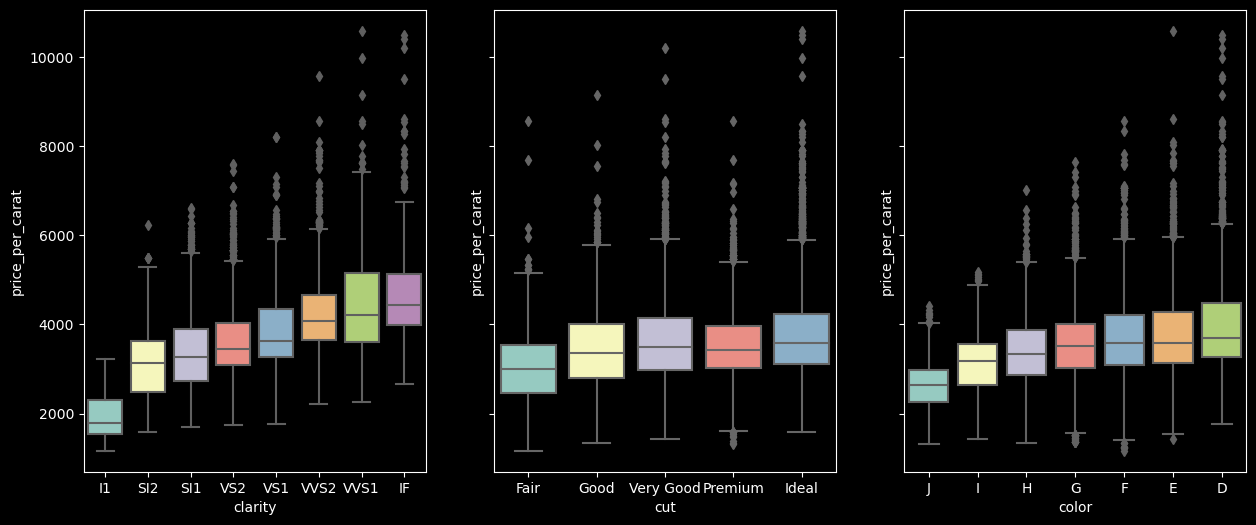

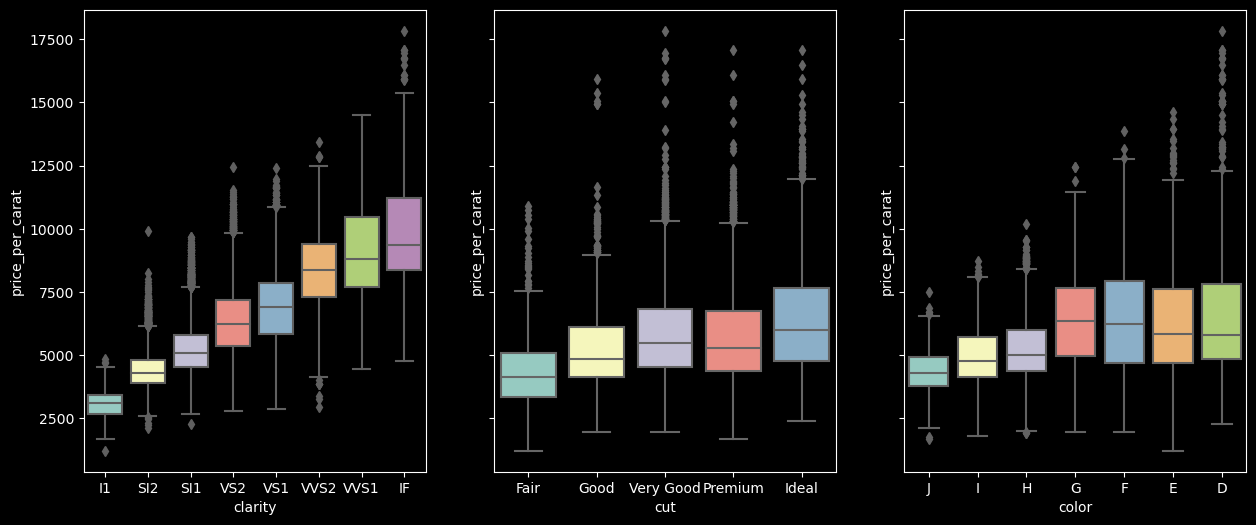

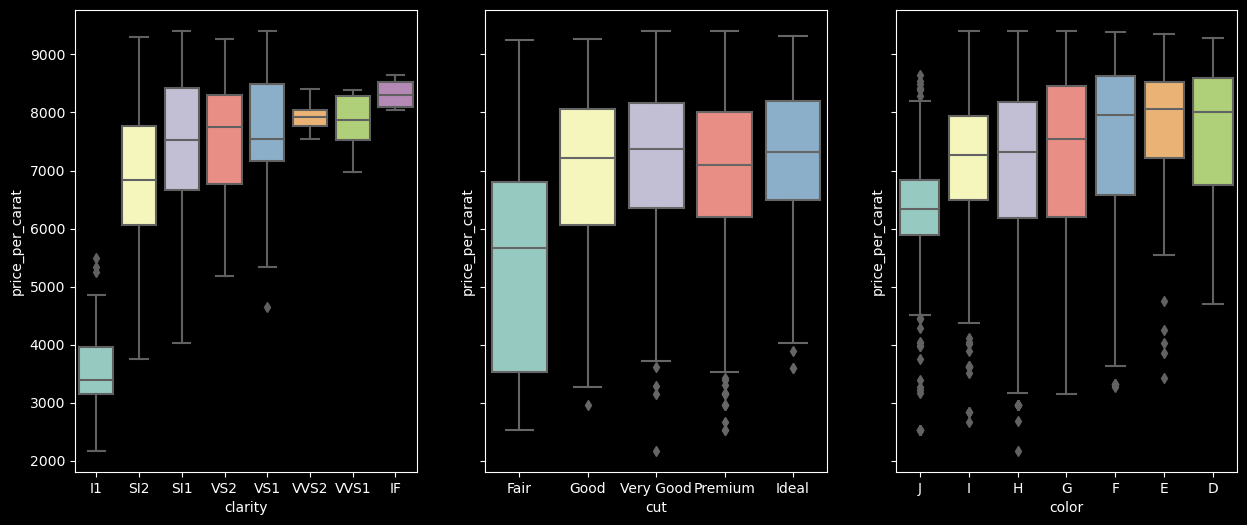

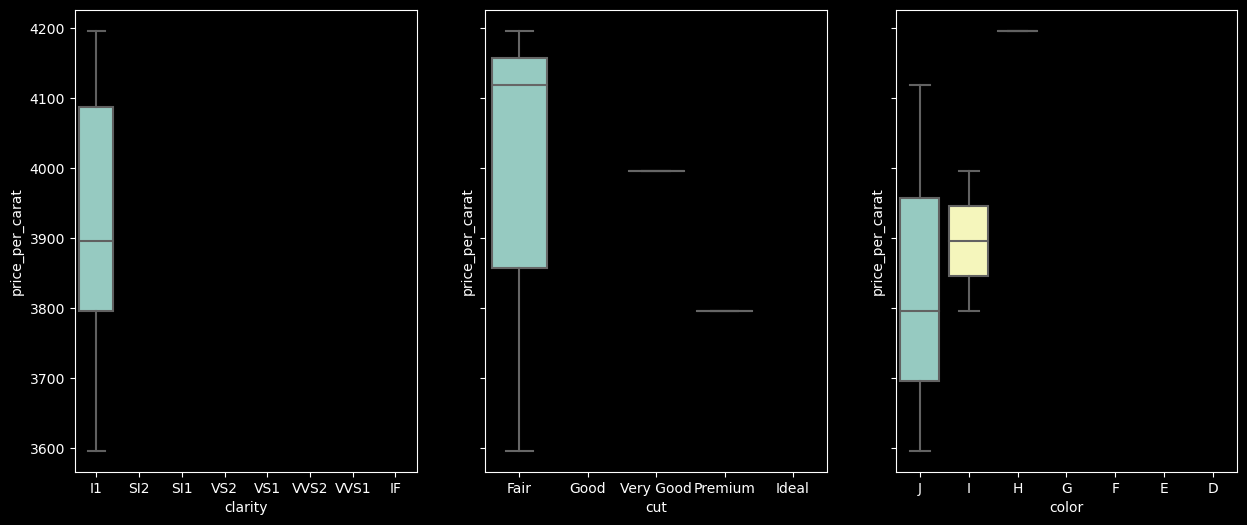

In [693]:
for carat_label in  carat_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,6))
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="clarity", ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="cut",ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="color",ax=axs[2])
    
    
    
    ax.set_title(carat_label.upper())


    plt.show()

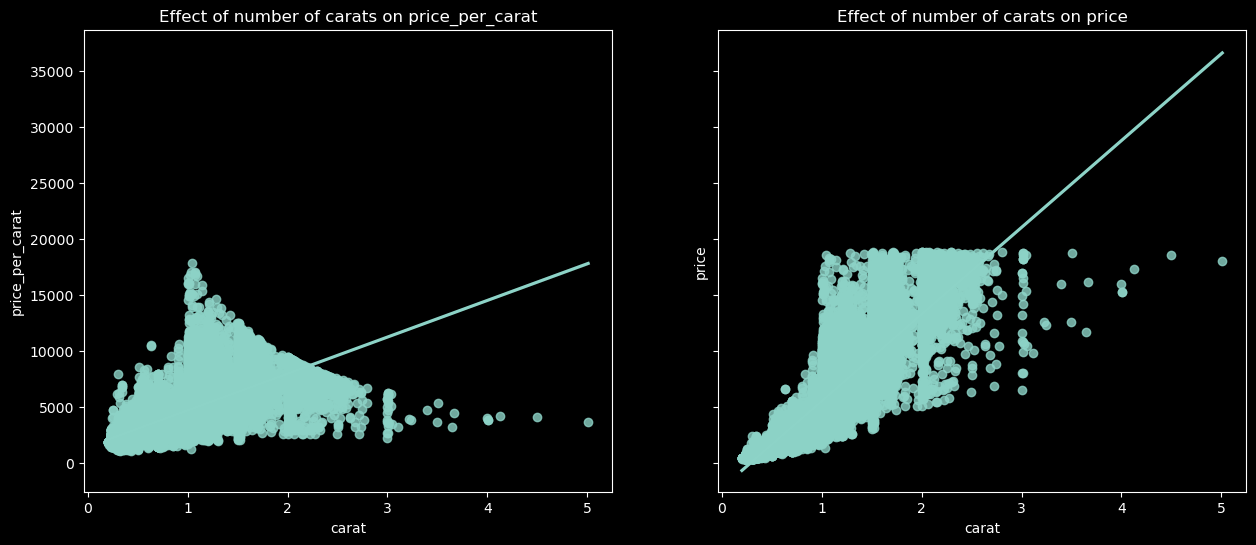

In [695]:
fig,axs=plt.subplots(1,2, figsize=(15,6),sharey=True)
axs[0].set_title("Effect of number of carats on price_per_carat")
axs[1].set_title("Effect of number of carats on price")
sns.regplot(data=dimonds,x="carat",y="price_per_carat",ax=axs[0])
sns.regplot(data=dimonds,x="carat",y="price",ax=axs[1])
plt.show()

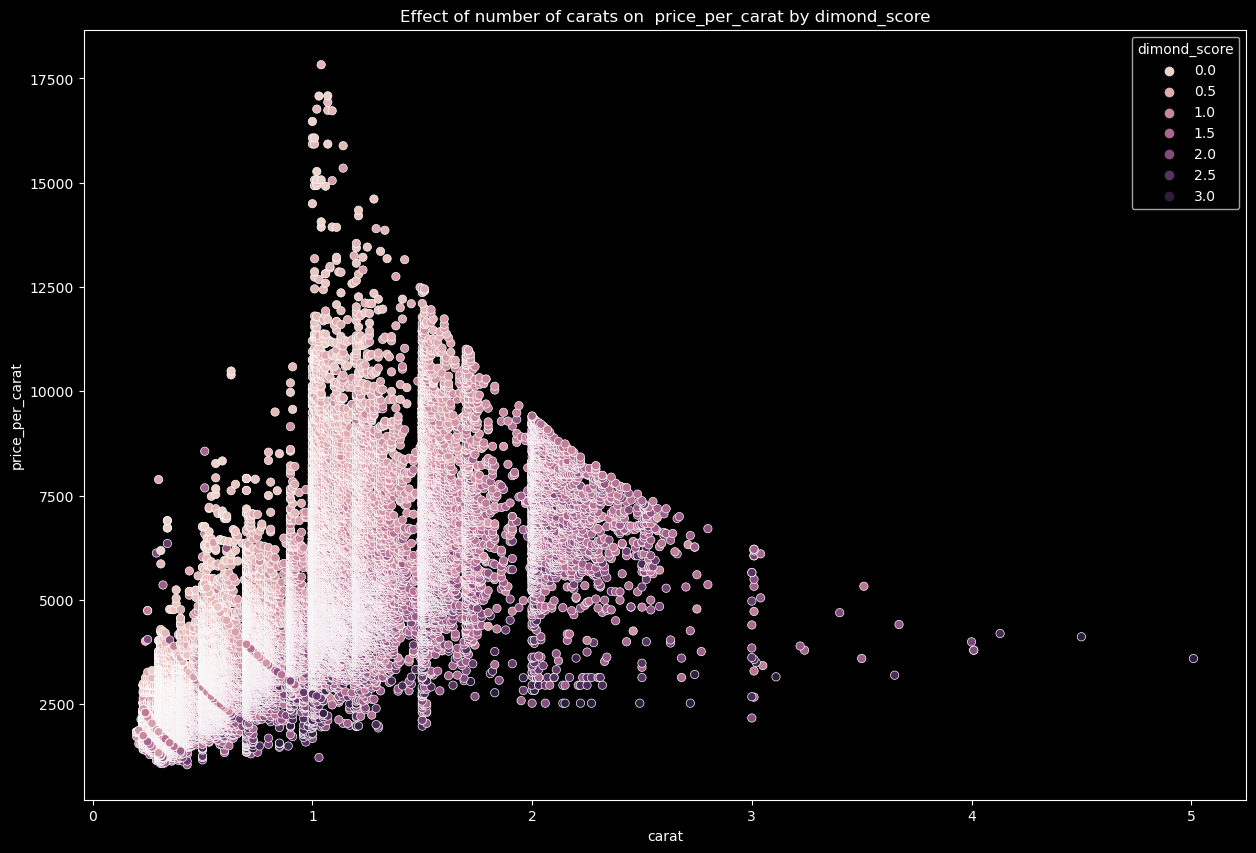

In [689]:
fig, axs=plt.subplots(figsize=(15,10))
sns.scatterplot(data=dimonds,x="carat",y="price_per_carat",hue="dimond_score")
plt.title("Effect of number of carats on  price_per_carat by dimond_score")
plt.show()

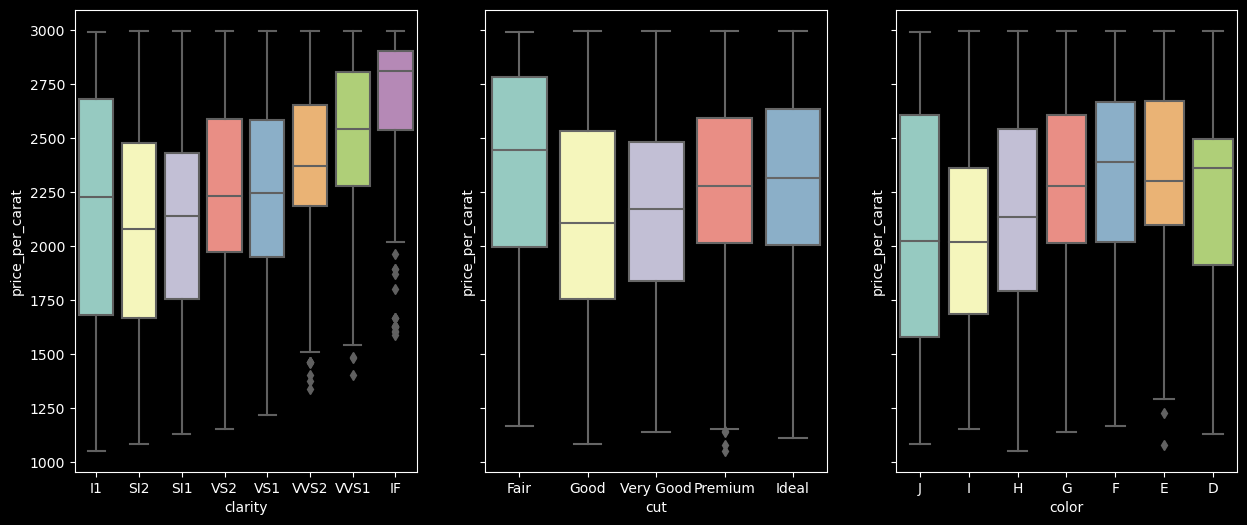

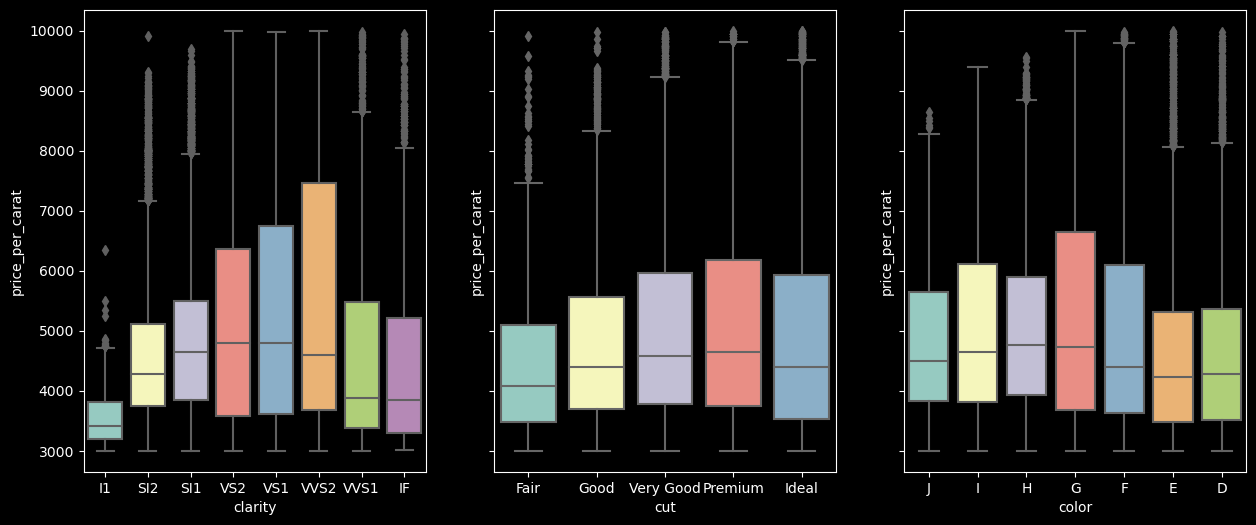

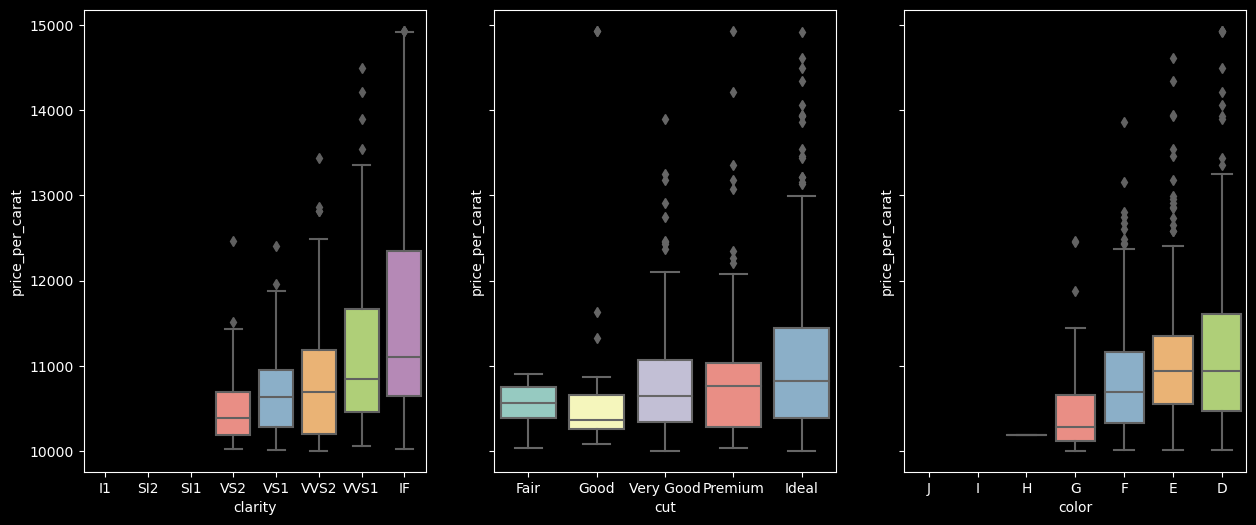

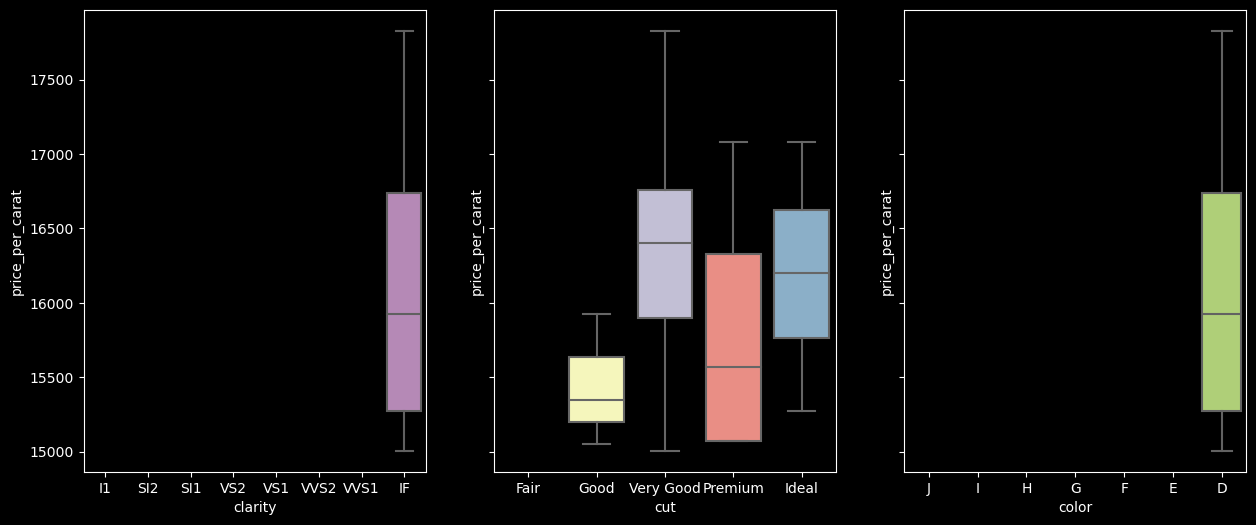

In [696]:
price_label_list=["Low","Average","High","Extra"]

for price_label in  price_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,6))
    sns.boxplot(data=dimonds[(dimonds["price_label"])==price_label],y="price_per_carat",x="clarity", ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["price_label"])==price_label],y="price_per_carat",x="cut",ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["price_label"])==price_label],y="price_per_carat",x="color",ax=axs[2])
    
   
    
    ax.set_title(price_label.upper())


    plt.show()

Logistic regression. Price per carat prediction based on 4c